In [2]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data/shopping_trends.csv', nrows=3900)

## Tiền xử lý dữ liệu (2)

In [4]:
# Kiểm tra các ngoại lệ
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
# Đếm số lượng dữ liệu khuyết cho từng cột
missing_data_counts = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
                          'Item Purchased', 'Category', 'Frequency of Purchases', 'Payment Method']].isnull().sum()

print("Số lượng dữ liệu bị khuyết cho từng cột:")
print(missing_data_counts)

Số lượng dữ liệu bị khuyết cho từng cột:
Age                       0
Purchase Amount (USD)     0
Review Rating             0
Previous Purchases        0
Item Purchased            0
Category                  0
Frequency of Purchases    0
Payment Method            0
dtype: int64


In [6]:
# Loại bỏ dữ liệu trùng lặp
df = df.drop_duplicates()

### Chuyển đổi dữ liệu

In [68]:
# Đổi tên các giá trị trong cột 'Gender' từ tiếng Anh sang tiếng Việt
df['Gender_VN'] = df['Gender'].map({
    'Male': 'Nam',
    'Female': 'Nữ'
})

# Hiển thị dữ liệu của cột Gender_VN và Gender
print(df[['Gender', 'Gender_VN']])

      Gender Gender_VN
0       Male       Nam
1       Male       Nam
2       Male       Nam
3       Male       Nam
4       Male       Nam
...      ...       ...
3895  Female        Nữ
3896  Female        Nữ
3897  Female        Nữ
3898  Female        Nữ
3899  Female        Nữ

[3900 rows x 2 columns]


## Phân tích mô tả (3)

### Độ tuổi trung bình của khách hàng cùng giới tính

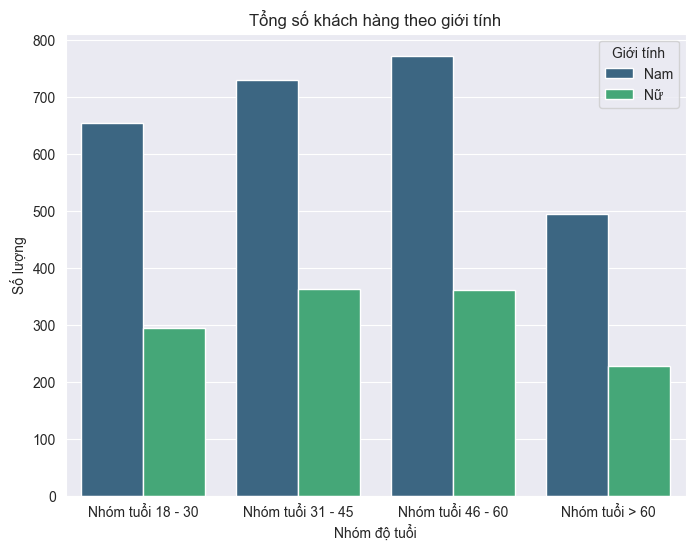

In [64]:
# Cột độ tuổi
def age_bracket(age):
    if 18 <= age <= 30:
        return 'Nhóm tuổi 18 - 30'
    elif 30 < age <= 45:
        return 'Nhóm tuổi 31 - 45'
    elif 45 < age <= 60:
        return 'Nhóm tuổi 46 - 60'
    else:
        return 'Nhóm tuổi > 60'

# Để tạo một cột mới trong bảng
df['Age_bracket'] = df['Age'].apply(age_bracket)

# Xác định thứ tự nhóm tuổi
age_bracket_order = ['Nhóm tuổi 18 - 30', 'Nhóm tuổi 31 - 45', 'Nhóm tuổi 46 - 60', 'Nhóm tuổi > 60']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Age_bracket', data=df, hue='Gender_VN', palette='viridis', order=age_bracket_order)
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Số lượng')
plt.title('Tổng số khách hàng theo giới tính')

# Đổi nhãn của chú giải (legend) từ tiếng Anh sang tiếng Việt
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Giới tính')

plt.show()

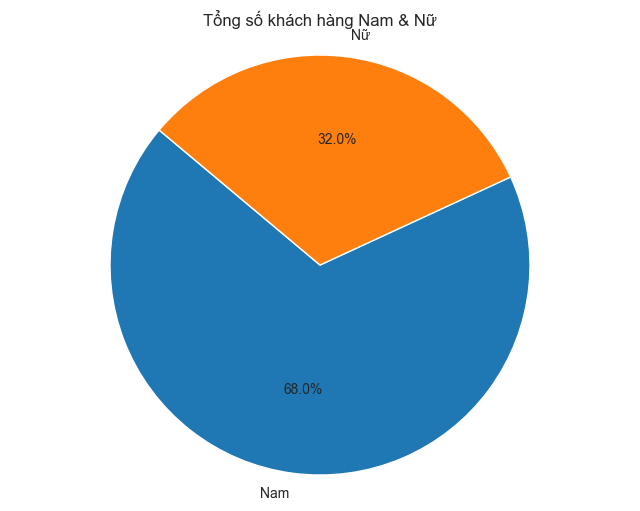

In [35]:
# Số lượng theo giới tính
Gender_counts = df['Gender_VN'].value_counts()

# Tạo biểu đồ hình tròn
plt.figure(figsize=(8, 6))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.title('Tổng số khách hàng Nam & Nữ')
plt.axis('equal')
plt.show()

### Loại mặt hàng được mua nhiều nhất là gì?

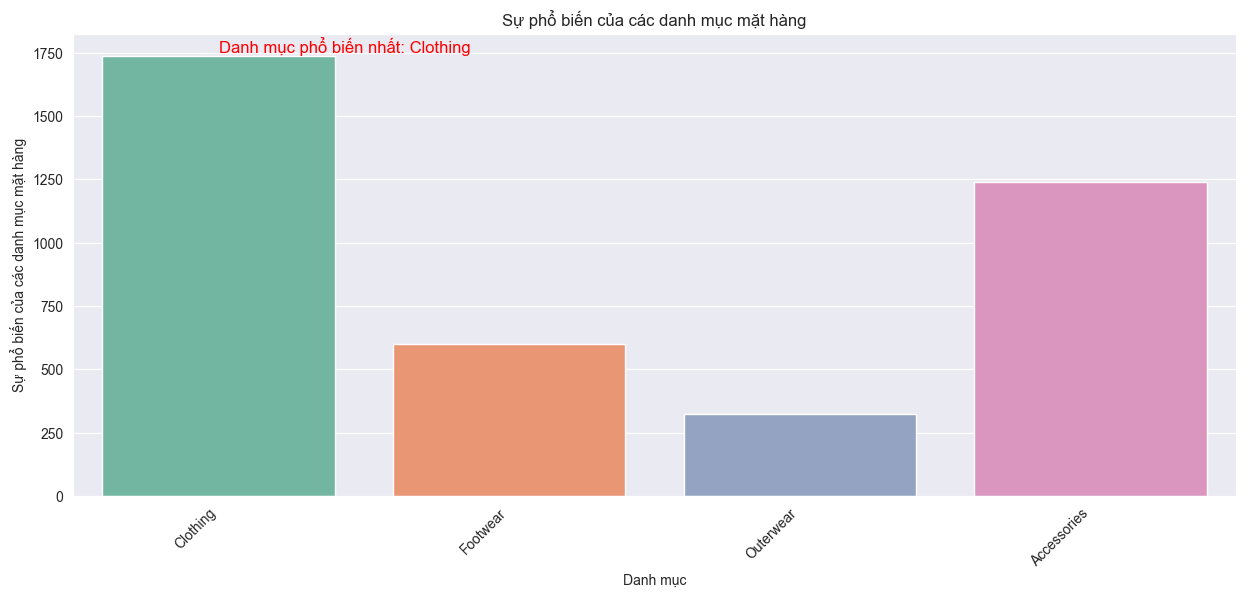

In [10]:
# Tính số lượng mặt hàng trong từng danh mục
category_counts = df['Category'].value_counts()

# Tìm danh mục phổ biến nhất
most_popular_category = category_counts.idxmax()

# Hiển thị sự phổ biến của các danh mục mặt hàng (sử dụng Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Category', data=df, palette="Set2")

# Thêm tiêu đề và các nhãn khác
plt.title("Sự phổ biến của các danh mục mặt hàng")
plt.xlabel("Danh mục")
plt.ylabel("Sự phổ biến của các danh mục mặt hàng")
plt.xticks(rotation=45, horizontalalignment='right')

# Chú thích danh mục phổ biến nhất
plt.text(category_counts.index.get_loc(most_popular_category),
         category_counts.max(), f'Danh mục phổ biến nhất: {most_popular_category}',
         ha='left', va='bottom', fontsize=12, color='red')

# Hiển thị biểu đồ
plt.show()

### Kích thước phổ biến nhất cho các mặt hàng quần áo được mua là gì?

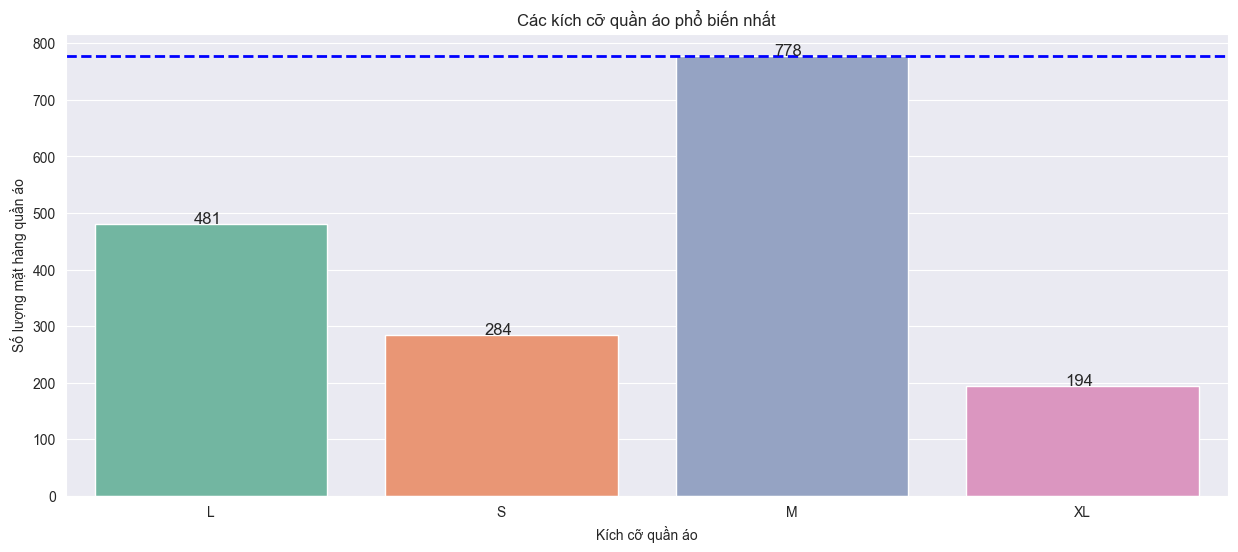

In [51]:
# Lọc tập dữ liệu để chỉ bao gồm các mặt hàng quần áo
clothing_df = df[df['Category'] == 'Clothing']

# Hiển thị các kích cỡ quần áo phổ biến nhất (sử dụng Seaborn)
plt.figure(figsize=(15, 6))
sns.countplot(x='Size', data=clothing_df, palette="Set2")

# Thêm tiêu đề và các nhãn khác
plt.title("Các kích cỡ quần áo phổ biến nhất")
plt.xlabel("Kích cỡ quần áo")
plt.ylabel("Số lượng mặt hàng quần áo")

# Đánh dấu kích cỡ quần áo phổ biến nhất
plt.axhline(y=clothing_df['Size'].value_counts().max(), color='b', linestyle='dashed', linewidth=2, label=f'Kích cỡ quần áo phổ biến nhất ({clothing_df["Size"].value_counts().max()})')

# Thêm số lượng của từng kích cỡ phía trên các thanh, làm cho kích thước phông chữ lớn hơn
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.34, p.get_height()+0.5), fontsize=12)

# Hiển thị biểu đồ
plt.show()

### Số tiền mua trung bình (USD) trong tập dữ liệu là bao nhiêu?

D:\thac_si\phan_tich_du_lieu\btl\customer-shopping-trends\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


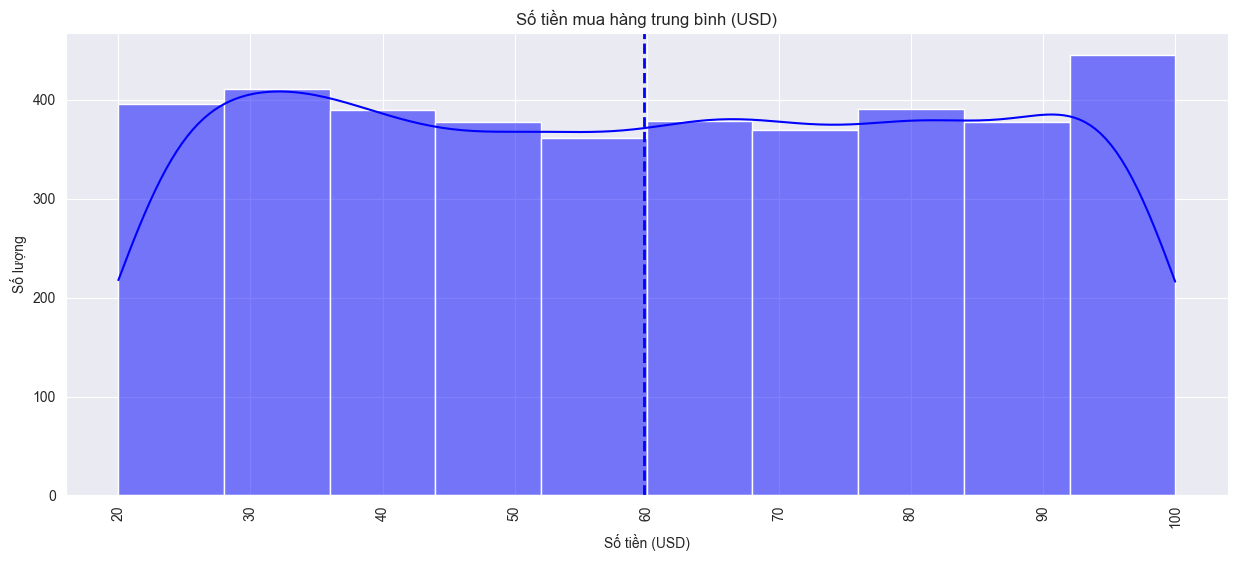

Số tiền mua hàng trung bình (USD) theo danh mục: 59.76


In [50]:
# Tính toán số tiền mua hàng trung bình (USD)
average_purchase_amount = df['Purchase Amount (USD)'].mean()

# Hiển thị số tiền mua hàng trung bình (USD) (sử dụng Seaborn)
plt.figure(figsize=(15, 6))
sns.histplot(x='Purchase Amount (USD)', data=df, bins=10, kde=True, color='b')

# Thêm tiêu đề và các nhãn khác
plt.title("Số tiền mua hàng trung bình (USD)")
plt.xlabel("Số tiền (USD)")
plt.ylabel("Số lượng")
plt.xticks(rotation=90)

# Thêm một đường dọc cho số tiền mua hàng trung bình (USD)
plt.axvline(average_purchase_amount, color='b', linestyle='dashed', linewidth=2, label=f'Số tiền mua hàng trung bình (USD) ({average_purchase_amount:.2f})')

# Hiển thị biểu đồ
plt.show()

print("Số tiền mua hàng trung bình (USD) theo danh mục: " + str(round(average_purchase_amount, 2)))

### Phân bổ các phương thức thanh toán

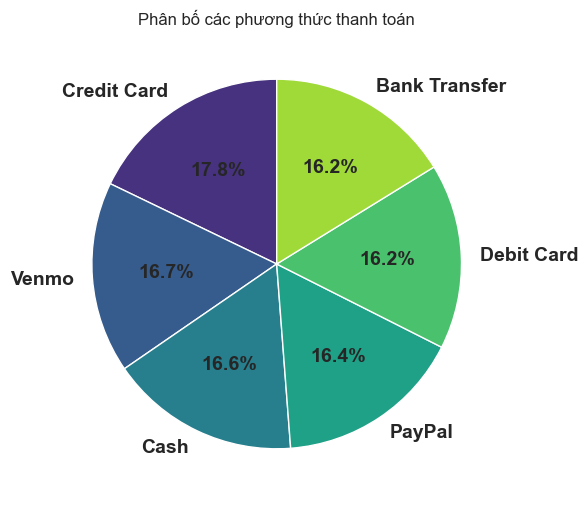

In [61]:
plt.figure(figsize=(6, 6))
payment_method_counts = df['Payment Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis'), textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Phân bố các phương thức thanh toán')
plt.show()

## Xây dựng mô hình mạng xã hội (4)

In [ ]:
# Khởi tạo đồ thị
G = nx.Graph()

# Thêm các nút vào đồ thị với thuộc tính từ DataFrame
for index, row in df.iterrows():
    G.add_node(row['Customer ID'], **row.to_dict())

# Nhóm dữ liệu theo Category và Item Purchased, tạo danh sách khách hàng cho mỗi nhóm
product_category_groups = df.groupby(['Category', 'Item Purchased'])['Customer ID'].apply(list)

# Tính toán trọng số cho các cạnh dựa trên 7 yếu tố
def compute_edge_weight(row1, row2):
    weight = 0
    
    # Đánh trọng số dựa trên Age (tỷ lệ chênh lệch tuổi)
    weight += 1 / (abs(row1['Age'] - row2['Age']) + 1)
    
    # Đánh trọng số dựa trên Purchase Amount (USD) (tỷ lệ chênh lệch số tiền mua)
    weight += 1 / (abs(row1['Purchase Amount (USD)'] - row2['Purchase Amount (USD)']) + 1)
    
    # Đánh trọng số dựa trên Review Rating (tỷ lệ chênh lệch đánh giá)
    weight += 1 / (abs(row1['Review Rating'] - row2['Review Rating']) + 1)
    
    # Đánh trọng số dựa trên Previous Purchases (tỷ lệ chênh lệch số lần mua trước đó)
    weight += 1 / (abs(row1['Previous Purchases'] - row2['Previous Purchases']) + 1)
    
    # Đánh trọng số dựa trên Item Purchased (cùng sản phẩm) và Category (cùng danh mục)
    if row1['Item Purchased'] == row2['Item Purchased'] and row1['Category'] == row2['Category']:
        weight += 5  # Cộng thêm trọng số lớn cho việc cùng mua sản phẩm và danh mục
    
    # Đánh trọng số dựa trên Frequency of Purchases (tần suất mua hàng)
    if row1['Frequency of Purchases'] == row2['Frequency of Purchases']:
        weight += 2  # Cộng thêm trọng số cho việc cùng tần suất mua hàng
    
    return weight

# Tính toán trọng số cho các cạnh
for (category, item), customers in product_category_groups.items():
    if len(customers) > 1:
        for i in range(len(customers)):
            for j in range(i + 1, len(customers)):
                c1 = customers[i]
                c2 = customers[j]
                row1 = df[df['Customer ID'] == c1].iloc[0]
                row2 = df[df['Customer ID'] == c2].iloc[0]
                weight = compute_edge_weight(row1, row2)
                
                if G.has_edge(c1, c2):
                    G[c1][c2]['weight'] += weight
                else:
                    G.add_edge(c1, c2, weight=weight, relationship='purchased_same_item', category=category, item=item)

In [ ]:
# # Vẽ đồ thị với trọng số cạnh
# # Chọn các cạnh có trọng số lớn hơn một ngưỡng
# threshold = 8
# edges_to_draw = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] > threshold]
# subgraph = G.edge_subgraph(edges_to_draw)
# 
# plt.figure(figsize=(35, 20))  # Kích thước của đồ thị
# pos = nx.spring_layout(subgraph, k=1, seed=42)  # Vị trí các nút
# nx.draw_networkx_nodes(subgraph, pos, node_size=300, node_color='skyblue')
# edges = nx.get_edge_attributes(subgraph, 'weight')
# nx.draw_networkx_edges(subgraph, pos, edgelist=edges.keys(), width=[weight * 0.1 for weight in edges.values()], alpha=0.5)
# nx.draw_networkx_labels(subgraph, pos, font_size=12, font_family='sans-serif')
# 
# # Hiển thị đồ thị
# plt.title("Customer Purchase Network")
# plt.show()

In [ ]:
# Vẽ đồ thị với trọng số cạnh
plt.figure(figsize=(35, 20))  # Kích thước của đồ thị
pos = nx.spring_layout(G, k=1, seed=42)  # Vị trí các nút
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edgelist=edges.keys(), width=[weight * 0.1 for weight in edges.values()],
                       alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Hiển thị đồ thị
plt.title("Customer Purchase Network")
plt.show()

In [ ]:
# Hiển thị số lượng đỉnh và cạnh
print(f"Tổng số đỉnh trong đồ thị: {G.number_of_nodes()}")
print(f"Tổng số cạnh trong đồ thị: {G.number_of_edges()}")

## Áp dụng thuật toán Given Newman trong phát hiện cộng đồng (5)

In [ ]:
def girvan_newman(G):
    # Danh sách để lưu các cộng đồng
    communities = []

    # Lặp cho đến khi đồ thị còn nhiều hơn 1 thành phần liên thông
    while nx.number_connected_components(G) == 1:
        # Tính toán betweenness centrality cho các cạnh
        edge_betweenness = nx.edge_betweenness_centrality(G)

        # Tìm các cạnh có betweenness centrality cao nhất
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)

        # Loại bỏ các cạnh có betweenness centrality cao nhất
        G.remove_edge(*edge_to_remove)

    # Lưu các cộng đồng
    for component in nx.connected_components(G):
        communities.append(component)

    return communities

# Áp dụng giải thuật Girvan-Newman
communities = girvan_newman(G)

In [ ]:
# Tạo danh sách màu sắc cho các cộng đồng
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

# Vẽ đồ thị
plt.figure(figsize=(26, 18))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Vẽ các nút và cạnh
for i, community in enumerate(communities):
    # print(community)
    # print(communities)
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], node_size=800, label=f'Community {i+1}')

# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

# Tạo nhãn cho các nút với thông tin từ thuộc tính
labels = {}
for node in G.nodes(data=True):
    customer_id = node[0]
    attributes = node[1]
    # Tạo nhãn cho mỗi nút bao gồm Customer ID, Category và Item Purchased
    labels[customer_id] = f"{customer_id}\n{attributes.get('Category', 'N/A')}\n{attributes.get('Item Purchased', 'N/A')}"

# Vẽ nhãn cho các nút
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='sans-serif', verticalalignment='top')

# Thêm chú giải cho các cộng đồng
plt.legend(loc='best', title="Communities", fontsize=10)
plt.title("Customer Purchase Network with Communities")
plt.show()

In [ ]:
community_sizes = [(i, len(community)) for i, community in enumerate(communities)]
community_sizes.sort(key=lambda x: x[1], reverse=True)

# In kích thước của các cộng đồng
for i, size in community_sizes[:5]:  # Lấy 5 cộng đồng lớn nhất
    print(f"Community {i+1} - Size: {size}")
